<a href="https://colab.research.google.com/github/BumaranChe/Using_Combined-Cycle-Power-Plant-CCPP-dataset-_Perform_Multiple_Linear_Regression_Python/blob/main/Multiple_Linear_Regression_using_CCPP_dataset(GitHub).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Combined Cycle Power Plant (CCPP)**

A Combined Cycle Power Plant (CCPP) is a highly efficient type of power plant that generates electricity by combining two thermodynamic cycles: the Brayton Cycle (gas turbine) and the Rankine Cycle (steam turbine). This combination improves overall efficiency and reduces energy waste compared to traditional single-cycle power plants.

This dataset is commonly used for regression tasks to predict the power output (PE) based on the other variables.

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011) when the plant was set to work at full load.

Let's analyze this dataset using Multiple Linear Regression and check on RMSE and MSE for evaluation

dataset = https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant

# **1. Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

ccp = pd.read_excel("/content/drive/MyDrive/Folds5x2_pp.xlsx")

In [ ]:
ccp.head(5)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
ccp = ccp[['AT','V','AP','RH','PE']]
ccp.head(5)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
corr=ccp.corr()
print(corr)

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


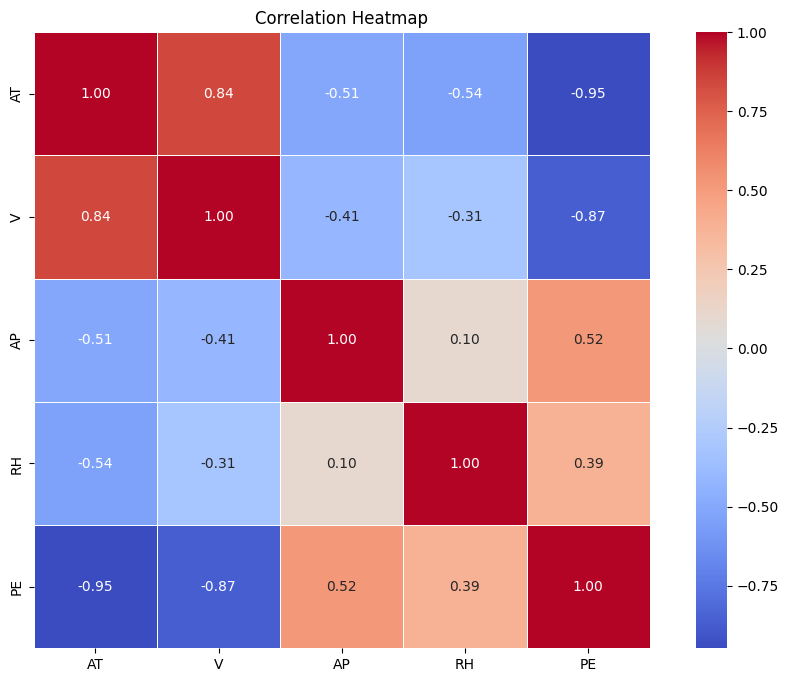

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# **2.Define x and y**

In [ ]:
X = ccp.drop("PE", axis = 1).values # 2d array (each row has 4 features)
y = ccp["PE"].values # 1d array (label)

# **3.Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **4.Create our Linear Model**

In [ ]:
model = LinearRegression() # mutli linear regression uses the same LinearRegression() as simple linear regression
model.fit(X_train, y_train)

LinearRegression()

# **5.Make prediction on test data set**

In [ ]:
x1 = X_test[:, 0]  # AT
x2 = X_test[:, 1]  # V
x3 = X_test[:, 2]  # AP
x4 = X_test[:, 3]  # RH
y_actual = y_test  # Actual power output
y_pred = model.predict(X_test)  # Predicted power output

# **6.Evaluate the model**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 19.733699303497637
Root Mean Squared Error: 4.44226285844249




MSE - accumulating the different between actual value and predicted value and then square it and total up it and then count average by dividing the squared differences in total with the total number of data

RMSE - tells how the data concentrated around best fit line. RMSE is the square root of MSE

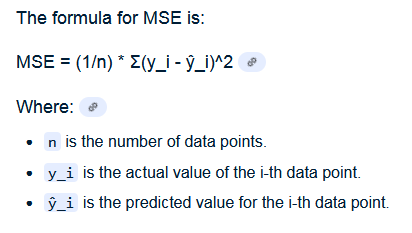


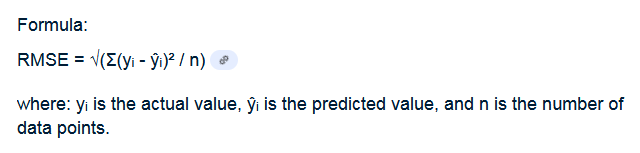


RMSE value is 4.4423, the value is high. The value close to zero is consired as a good fit for this dataset. Next, we can try to drop less correlated parameters and re-train the linear regression and create our Linear model or we can try using a different regression model such as Decision Tree Regressor or Random Forest Regression.

**Compare it to the variance or mean of y**

In [ ]:
import numpy as np
mean_y=np.mean(y_test)
relative_error=np.sqrt(mse)/mean_y
percentage_error= relative_error*100
print(relative_error)
print(percentage_error)


0.009771538615217503
0.9771538615217503


**reative_error is small (<10%-15%)**, error is likely acceptable


**caculate r2 and adj_r2**

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics
r2 = round(metrics.r2_score(y_test, y_pred), 2)
print(f"{model} R2 : {r2}")
adj_r2 = round(1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X.shape[1] - 1), 2)
print(f"{model} adj_R2 : {adj_r2}")

LinearRegression() R2 : 0.93
LinearRegression() adj_R2 : 0.93


R2 value high and mse comparison with mean of y (y = actual target values) is less than 10%, the relative error is only about 0.977%, so it is in acceptable range. The model fits the data. Anyhow, for learnng purpose we drop some features and perform feature selections like ANOVA, SFS, Lasso, RFE

Text(0.5, 1.0, 'Actual vs Predicted')

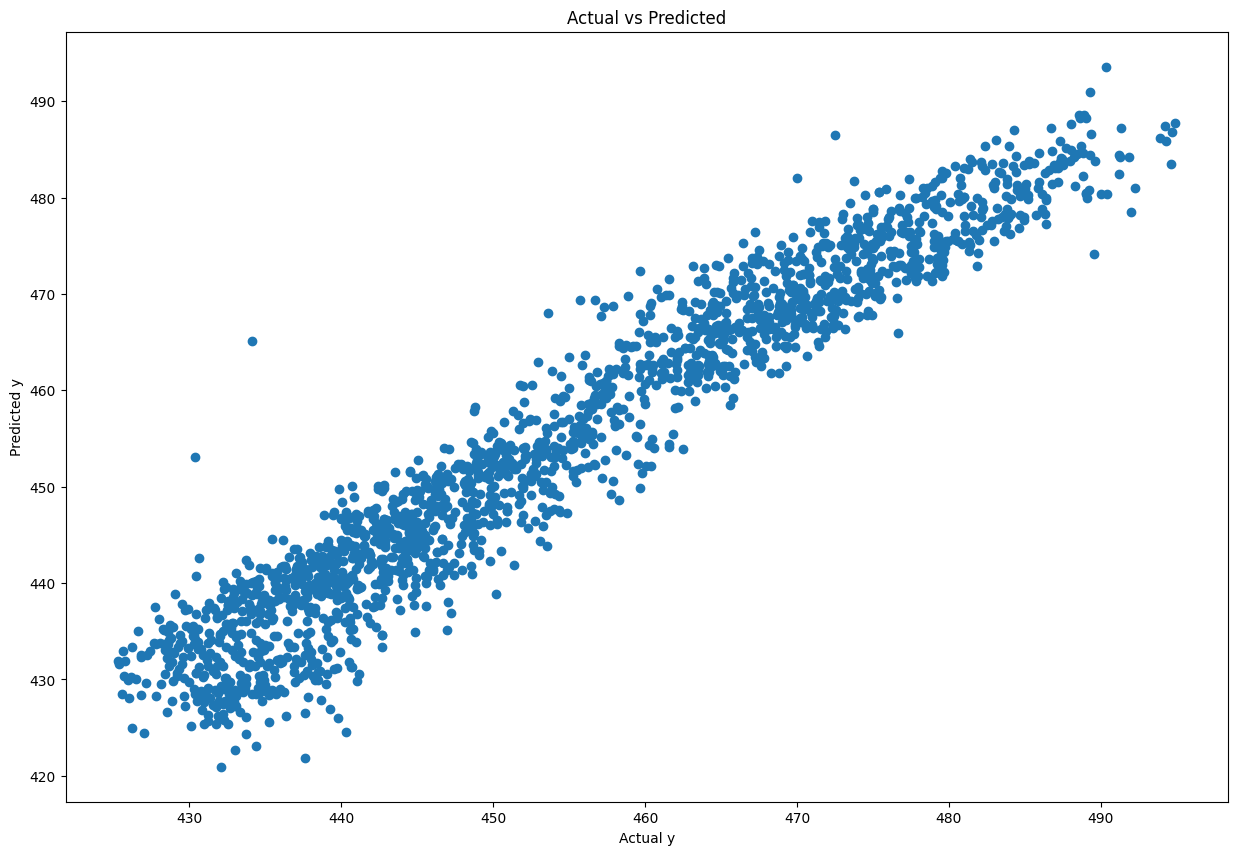

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(y_test,y_pred)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')

plt.title("Actual vs Predicted")

The Y-scale and X-scale are bigger numbers, so that's why the MSE and RMSE value are high. We probably can try a different regression to see if the value of MSE and RMSE drops close to zero. Based on the plot avbove, generally the y-actual and y-pred shows great linearity.

# **Now let's try to drop less correlated parameter**

In [ ]:
corr=ccp.corr()
print(corr)

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


Let's drop AP (correlation value with PE = approximately 0.52) and RH (correlation value with PE = approximately 0.39)

# **Linear regression by selecting features. Drop AP and RH**

# **1. Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

ccp = pd.read_excel("/content/drive/MyDrive/Folds5x2_pp.xlsx")

# **2.Define x and y**

In [ ]:
X = ccp.drop(["PE","AP","RH"],axis = 1).values
#X = ccp.drop("PE", axis =1)
#X = ccp.drop("AP" , axis =1)
#X = ccp.drop("RH" , axis=1)
y = ccp["PE"].values # 1d array (label)

In [ ]:
print(X)

[[14.96 41.76]
 [25.18 62.96]
 [ 5.11 39.4 ]
 ...
 [31.32 74.33]
 [24.48 69.45]
 [21.6  62.52]]


In [ ]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


# **3.Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **4.Create our Linear Model**

In [ ]:
model2 = LinearRegression() # mutli linear regression uses the same LinearRegression() as simple linear regression
model2.fit(X_train, y_train)

LinearRegression()

# **5.Make prediction on test data set**

In [ ]:
x1 = X_test[:, 0]  # AT
x2 = X_test[:, 1]  # V

y_actual = y_test  # Actual power output
y_pred = model2.predict(X_test)  # Predicted power output

# **6. Visualisation of the input ( features) versus output (target)**

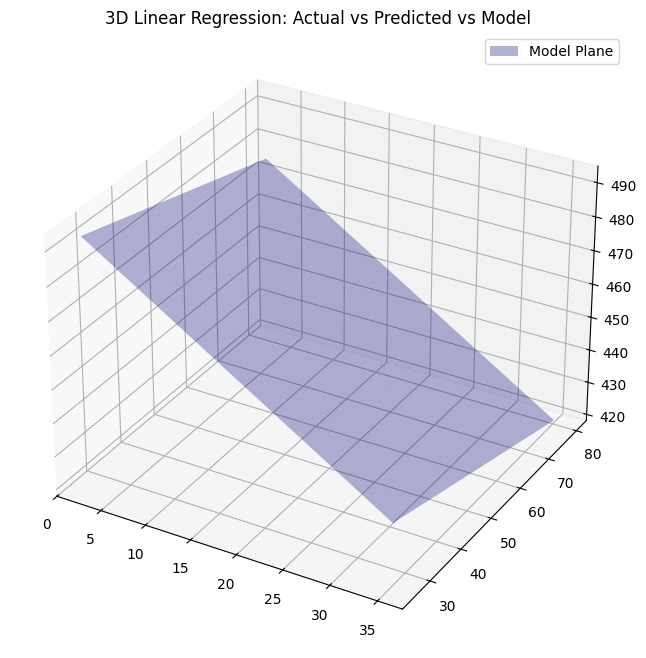

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a mesh grid for the model's surface
x1_range = np.linspace(x1.min(), x1.max(), 50)  # Range for AT
x2_range = np.linspace(x2.min(), x2.max(), 50)  # Range for V
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
X_mesh = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]  # Combine into a grid of inputs

# Predict y values (PE) for the mesh grid
y_mesh = model2.predict(X_mesh).reshape(x1_mesh.shape)

# Plot the model's surface (plane)
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, alpha=0.3, color='blue', label="Model Plane")

ax.set_title("3D Linear Regression: Actual vs Predicted vs Model")

ax.legend()

plt.show()

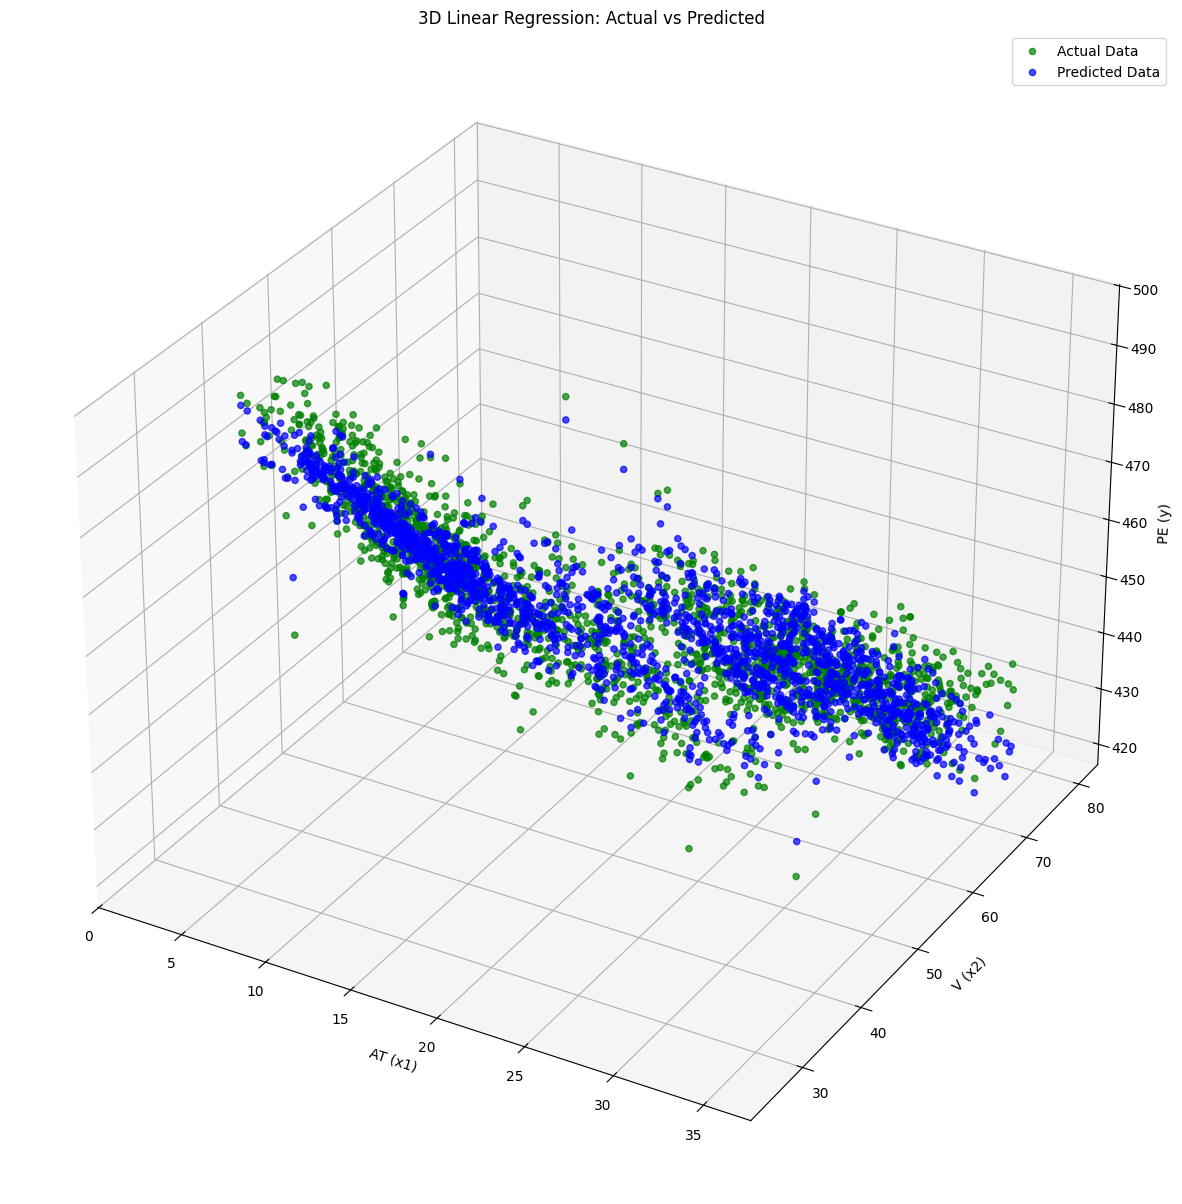

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming `X_test` has two features: AT (x1) and V (x2)
x1 = X_test[:, 0]  # AT
x2 = X_test[:, 1]  # V
y_actual = y_test  # PE
y_pred = model2.predict(X_test)  # Predicted power output

# Create a 3D plot
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(111, projection='3d')

# Plot actual test data
ax.scatter(x1, x2, y_actual, color='g', alpha=0.7, label="Actual Data")

# Plot predicted data as a surface or scatter
ax.scatter(x1, x2, y_pred, color='b', alpha=0.7, label="Predicted Data")

ax.set_xlabel("AT (x1)")
ax.set_ylabel("V (x2)")
ax.set_zlabel("PE (y)")
ax.set_title("3D Linear Regression: Actual vs Predicted")

ax.legend()

plt.show()

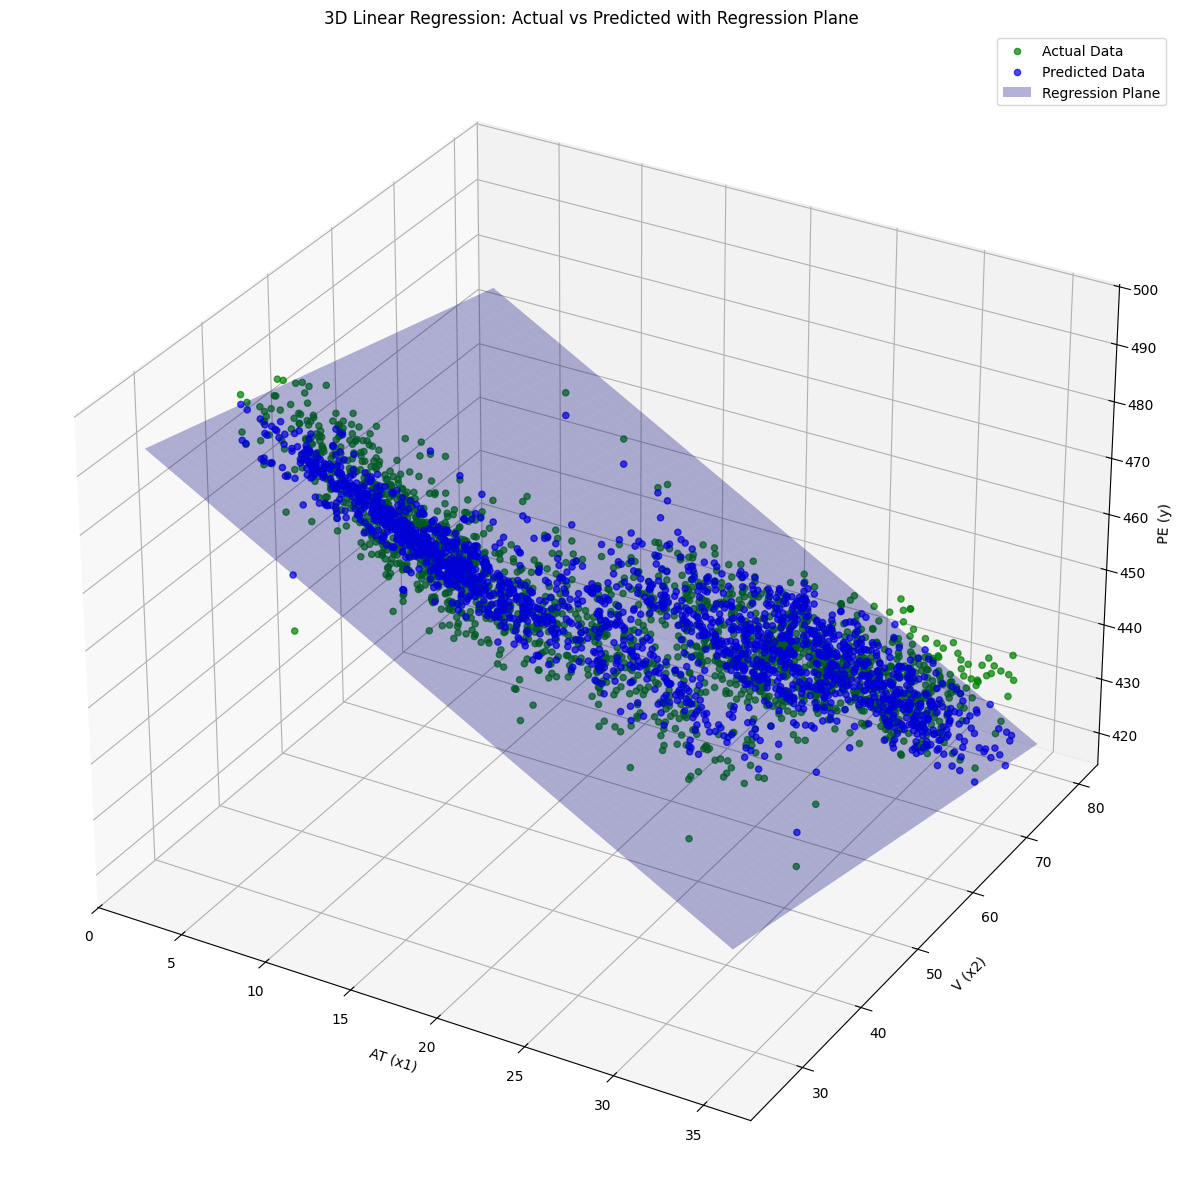

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##Combining model2 plane together with y_pred and y_actual

# Assuming `X_test` has two features: AT (x1) and V (x2)
x1 = X_test[:, 0]  # AT
x2 = X_test[:, 1]  # V
y_actual = y_test  # PE
y_pred = model2.predict(X_test)  # Predicted PE

# Create a 3D plot
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(111, projection='3d')

# Plot actual test data
ax.scatter(x1, x2, y_actual, color='g', alpha=0.7, label="Actual Data")

# Plot predicted data
ax.scatter(x1, x2, y_pred, color='b', alpha=0.7, label="Predicted Data")

# Create a grid for the regression plane
x1_range = np.linspace(x1.min(), x1.max(), 50)  # Grid for x1 (AT)
x2_range = np.linspace(x2.min(), x2.max(), 50)  # Grid for x2 (V)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)  # Create a 2D grid

# Flatten the grid and predict the corresponding y values
x_grid_flattened = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_grid_pred = model2.predict(x_grid_flattened).reshape(x1_grid.shape)  # Predict and reshape

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid_pred, color='blue', alpha=0.3, label="Regression Plane")

ax.set_xlabel("AT (x1)")
ax.set_ylabel("V (x2)")
ax.set_zlabel("PE (y)")
ax.set_title("3D Linear Regression: Actual vs Predicted with Regression Plane")

ax.legend()

plt.show()

There are a lot of actual data outside of the model2 multiple linear regression plane

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Create a scatter plot for actual data points
scatter_actual = go.Scatter3d(
    x=x1, y=x2, z=y_actual, mode='markers', marker=dict(color='green', size=5),
    name="Actual Data"
)

# Create a scatter plot for predicted data points
scatter_pred = go.Scatter3d(
    x=x1, y=x2, z=y_pred, mode='markers', marker=dict(color='blue', size=5),
    name="Predicted Data"
)

# Create a grid for the regression plane
x1_range = np.linspace(x1.min(), x1.max(), 50)
x2_range = np.linspace(x2.min(), x2.max(), 50)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
x_grid_flattened = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_grid_pred = model2.predict(x_grid_flattened).reshape(x1_grid.shape)

# Create the regression plane
surface = go.Surface(
    x=x1_grid, y=x2_grid, z=y_grid_pred, colorscale='reds', opacity=0.5, showscale=False,
    name="Regression Plane"
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis_title='AT',
        yaxis_title='V',
        zaxis_title='PE'
    ),
    title="3D Linear Regression: Actual vs Predicted with Regression Plane"
)

fig = go.Figure(data=[scatter_actual, scatter_pred, surface], layout=layout)
fig.show()

In [ ]:
print(x1)

[28.66 17.48 14.86 ... 12.24 27.28 17.28]


In [ ]:
print(x2)

[77.95 49.39 43.14 ... 44.92 47.93 39.99]


# **7.Evaluate the model**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 23.50970822077997
Root Mean Squared Error: 4.848681080539322


The RMSE and MSE values become even worst than before. By observing the model2 multiple linear regression plane, there are a lot of actual data are outside of the 3D linear regression plane. So, that's why the MSE and RMSE value becomes even worst.

Let's use ANOVA co-efficient to determine if the independent variable(s) (Features) significantly impact the dependent variable (Target), essentially testing the model's overall significance

# **Feature Selection**

# **1.0 ANOVA**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
ccp = pd.read_excel("/content/drive/MyDrive/Folds5x2_pp.xlsx")

In [ ]:
ccp.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
#X = ccp.drop(["PE"],axis = 1).values
#y = ccp["PE"].values # 1d array (label)

In [ ]:
ccp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df=ccp

In [ ]:
X1 = df['AT']
X2 = df['V']
X3 = df['AP']
X4 = df['RH']
y=df['PE']
#df=pd.DataFrame({'X1':X1,'X2':X2,'X3':X3,'X4':X4,'y':y})
model3=smf.ols('y ~ X1+X2+X3+X4', data=df).fit() # fit model --> ols mean ordinary least square, a method used to fit a linear regression model

In [ ]:
print("Regression_Coeeficient:\n")
print(model3.summary()) # summary of the model fit

Regression_Coeeficient:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        15:18:47   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      

In [ ]:
anova_table=sm.stats.anova_lm(model3,typ=2) # get ANOVA table
print("\nANOVA TABLE:\n")
print(anova_table)


ANOVA TABLE:

                 sum_sq      df             F         PR(>F)
X1        347606.903234     1.0  16729.359176   0.000000e+00
X2         21439.625136     1.0   1031.829881  4.375305e-215
X3           895.277303     1.0     43.087221   5.507109e-11
X4         29875.196410     1.0   1437.810603  3.104584e-293
Residual  198702.459591  9563.0           NaN            NaN


Based on the results, the F value a higher and p-value are < 0.05, it explains that all the features is statistically significant. There's strong evidence it has some effect on the output. So, we can't drop any features

# **1.1 Recursive Feature Elimination (RFE)**

# **Import necessary Libraries**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import pandas as pd

# **Load DataSet **

In [ ]:
ccp = pd.read_excel("/content/drive/MyDrive/Folds5x2_pp.xlsx")

In [ ]:
df=ccp

In [ ]:
X = df.drop(["PE"],axis = 1).values
y = df["PE"].values # 1d array (label)

In [ ]:
X1 = df['AT']
X2 = df['V']
X3 = df['AP']
X4 = df['RH']
y=df['PE']

In [ ]:
model=LinearRegression()

In [ ]:
rfe=RFE(model,n_features_to_select=5)
rfe.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(


RFE(estimator=LinearRegression(), n_features_to_select=5)

In [ ]:
print("Selected features (True=kept):", rfe.support_)
print("Feature ranking (1=best):",rfe.ranking_)

Selected features (True=kept): [ True  True  True  True]
Feature ranking (1=best): [1 1 1 1]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline= Pipeline([('scaler', StandardScaler()),('feature_selection',RFE(LinearRegression(),n_features_to_select=5)),('regression',LinearRegression())])

pipeline.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 RFE(estimator=LinearRegression(), n_features_to_select=5)),
                ('regression', LinearRegression())])

In [ ]:
print("Selected features (True=kept):", rfe.support_)
print("Feature ranking (1=best):",rfe.ranking_)

Selected features (True=kept): [ True  True  True  True]
Feature ranking (1=best): [1 1 1 1]


# **1.2 Genetic Algorithms/SFS**

# **import libraries**

In [ ]:
!pip install mlxtend

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd

In [ ]:
ccp = pd.read_excel("/content/drive/MyDrive/Folds5x2_pp.xlsx")

In [ ]:
df=ccp

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
X = df.drop(["PE"],axis = 1)
y = df["PE"] # 1d array (label)

In [ ]:
feature_names=X.columns.tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
sfs=SFS(LinearRegression(),k_features=(1,4),forward=True,floating=False,scoring='r2',cv=5)

In [ ]:
sfs=sfs.fit(X_train,y_train)

In [ ]:
print('Selected features:',sfs.k_feature_names_)

Selected features: ('AT', 'V', 'AP', 'RH')


In [ ]:
print(list(sfs.k_feature_names_))

['AT', 'V', 'AP', 'RH']


# **1.3 Lasso Regularization**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
ccp = pd.read_excel("/content/drive/MyDrive/Folds5x2_pp.xlsx")

In [ ]:
df=ccp

In [ ]:
X = df.drop(["PE"],axis = 1)
y = df["PE"] # 1d array (label)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Create Lasso model

In [ ]:
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred=lasso.predict(X_test)

In [ ]:
print("R2 Score:", r2_score(y_test,y_pred))
print("Mean Squared Error:", mean_squared_error(y_test,y_pred))

R2 Score: 0.9325302575967062
Mean Squared Error: 19.73407891744115


view the coefficients





In [ ]:
coeff_df=pd.DataFrame({'Feature':X.columns,'Coefficient':lasso.coef_})

In [ ]:
print("\nLasso Coefficients:\n",coeff_df)


Lasso Coefficients:
   Feature  Coefficient
0      AT    -1.968143
1       V    -0.238122
2      AP     0.062419
3      RH    -0.156599


In [ ]:
selected_features=coeff_df[coeff_df['Coefficient']!=0]['Feature'].tolist()
print("\nSelected Features:", selected_features)


Selected Features: ['AT', 'V', 'AP', 'RH']


# **1.4 Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load data
ccp = pd.read_excel("/content/drive/MyDrive/Folds5x2_pp.xlsx")
X = df.drop(["PE"],axis = 1)
y = df["PE"] # 1d array (label)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Get feature importances
importances = tree.feature_importances_

# Create DataFrame of features and importance
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feat_imp)

# Select top N features (e.g., top 5)
top_features = feat_imp['Feature'].head(5).tolist()
print("\nTop 5 Features:", top_features)

# Reduce dataset to top features
X_top = X[top_features]

Feature Importances:
   Feature  Importance
0      AT    0.905559
1       V    0.056878
2      AP    0.020719
3      RH    0.016844

Top 5 Features: ['AT', 'V', 'AP', 'RH']


After doing all the above feature selection methods (ANOVA,Recursive Feature Elimination (RFE), Genetic Algorithms/SFS, Lasso Regularization and DecisionTree), looks like all the features are important.Can't drop any of the feature

Since Linear Regression giving high MSe and RMSE value, let's try out Decision Tree Regressor and Random Forest Regressor

# **Decision Tree Regressor**

**Import necessary libraries and load dataset**

In [45]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree

ccp = pd.read_excel("/content/drive/MyDrive/Folds5x2_pp.xlsx")

# **1.0 Define X and Y**

In [46]:
X = ccp.drop("PE", axis = 1).values # 2d array (each row has 4 features)
#X = ccp.drop(["PE","AP","RH"],axis = 1).values
y = ccp["PE"].values # 1d array (label)

In [47]:
corr=ccp.corr()
print(corr)

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


# **1.1 Train Test Split**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **1.2 Create our Decision Tree Model**

In [51]:
model3 = DecisionTreeRegressor()
model3.fit(X_train, y_train)

DecisionTreeRegressor()

# **1.3 Make prediction on Test Data Set**

In [52]:
x1 = X_test[:, 0]  # AT
x2 = X_test[:, 1]  # V
x3 = X_test[:, 2]  # AP
x4 = X_test[:, 3]  # RH
y_actual = y_test  # Actual power output
y_pred = model3.predict(X_test)  # Predicted power output

# **1.4 Evaluate the model**

In [53]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 22.572021734587246
Root Mean Squared Error: 4.751002182128235


# **1.5 Import GridSearchCV (for hyperparameter tuning)**

In [54]:
from sklearn.model_selection import GridSearchCV # GridSearchCV is a technique in machine learning used for hyperparameter tuning

In [55]:
# param_grid is Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list
# of such dictionaries, in which case the grids spanned by each dictionary in the list are explored.
# This enables searching over any sequence of parameter settings.
param_grid= {
    "max_depth":[None,5,10,15], #The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    "min_samples_split":[2,5,10],#The minimum number of samples required to split an internal node
    "min_samples_leaf":[1,2,5],# The minimum number of samples required to be at a leaf node.
    "max_features":[None,"auto","sqrt","log2"] #The number of features to consider when looking for the best split
}

In [56]:
grid_search=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=param_grid,cv=5,scoring="neg_mean_squared_error")
#estimator --> This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function, or scoring must be passed.
#param_grid --> Dictionary with parameters names (str) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.
#cv=5 --. Determines the cross-validation splitting strategy.Default 5 fold cross validation
#scoring --> Strategy to evaluate the performance of the cross-validated model on the test set. Regression --> ‘neg_mean_squared_error’
## Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as ‘neg_mean_squared_error’ which return the negated value of the metric.

# **1.6 Creating the tuned Model**

In [57]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

# **1.7 Evaluate the model**

In [58]:
best_params=grid_search.best_params_
# grid_search.best_params_ --> Parameter setting that gave the best results on the hold out data.

In [59]:
print(best_params)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5}


In [65]:
grid_search.best_estimator_
# best_estimator_ --> Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.

DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=5)

In [66]:
tree_model=grid_search.best_estimator_

In [67]:
print(grid_search.best_estimator_)

DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=5)


In [68]:
grid_search.best_estimator_.predict([[30,10,20,50]])

array([440.52285714])

In [69]:
y_pred_tuned=grid_search.best_estimator_.predict(X_test)

mse_tuned=mean_squared_error(y_test,y_pred_tuned)

rmse_tuned = np.sqrt(mse_tuned)

print(f"Mean Squared Error: {mse_tuned}")
print(f"Root Mean Squared Error: {rmse_tuned}")

Mean Squared Error: 18.580396889084607
Root Mean Squared Error: 4.310498450189329


After hyperparameter tuning, the RMSE and MSE value are a bit lower compared with Linear Regression Model. The RMSE value is about 3.911

[Text(0.5296118951612904, 0.9545454545454546, 'AP <= 1013.995\nsquared_error = 290.924\nsamples = 7654\nvalue = 454.303'),
 Text(0.2781418010752688, 0.8636363636363636, 'RH <= 76.84\nsquared_error = 232.838\nsamples = 4434\nvalue = 447.473'),
 Text(0.4038768481182796, 0.9090909090909092, 'True  '),
 Text(0.1147886798088411, 0.7727272727272727, 'AT <= 21.125\nsquared_error = 149.315\nsamples = 2517\nvalue = 442.752'),
 Text(0.049693847072879334, 0.6818181818181818, 'V <= 43.325\nsquared_error = 103.259\nsamples = 474\nvalue = 462.893'),
 Text(0.02426821983273596, 0.5909090909090909, 'AT <= 13.485\nsquared_error = 70.795\nsamples = 289\nvalue = 468.185'),
 Text(0.009109916367980884, 0.5, 'AT <= 8.775\nsquared_error = 44.736\nsamples = 95\nvalue = 477.537'),
 Text(0.0023894862604540022, 0.4090909090909091, 'AT <= 5.52\nsquared_error = 19.187\nsamples = 20\nvalue = 488.178'),
 Text(0.0011947431302270011, 0.3181818181818182, 'squared_error = 6.348\nsamples = 6\nvalue = 493.15'),
 Text(0.003

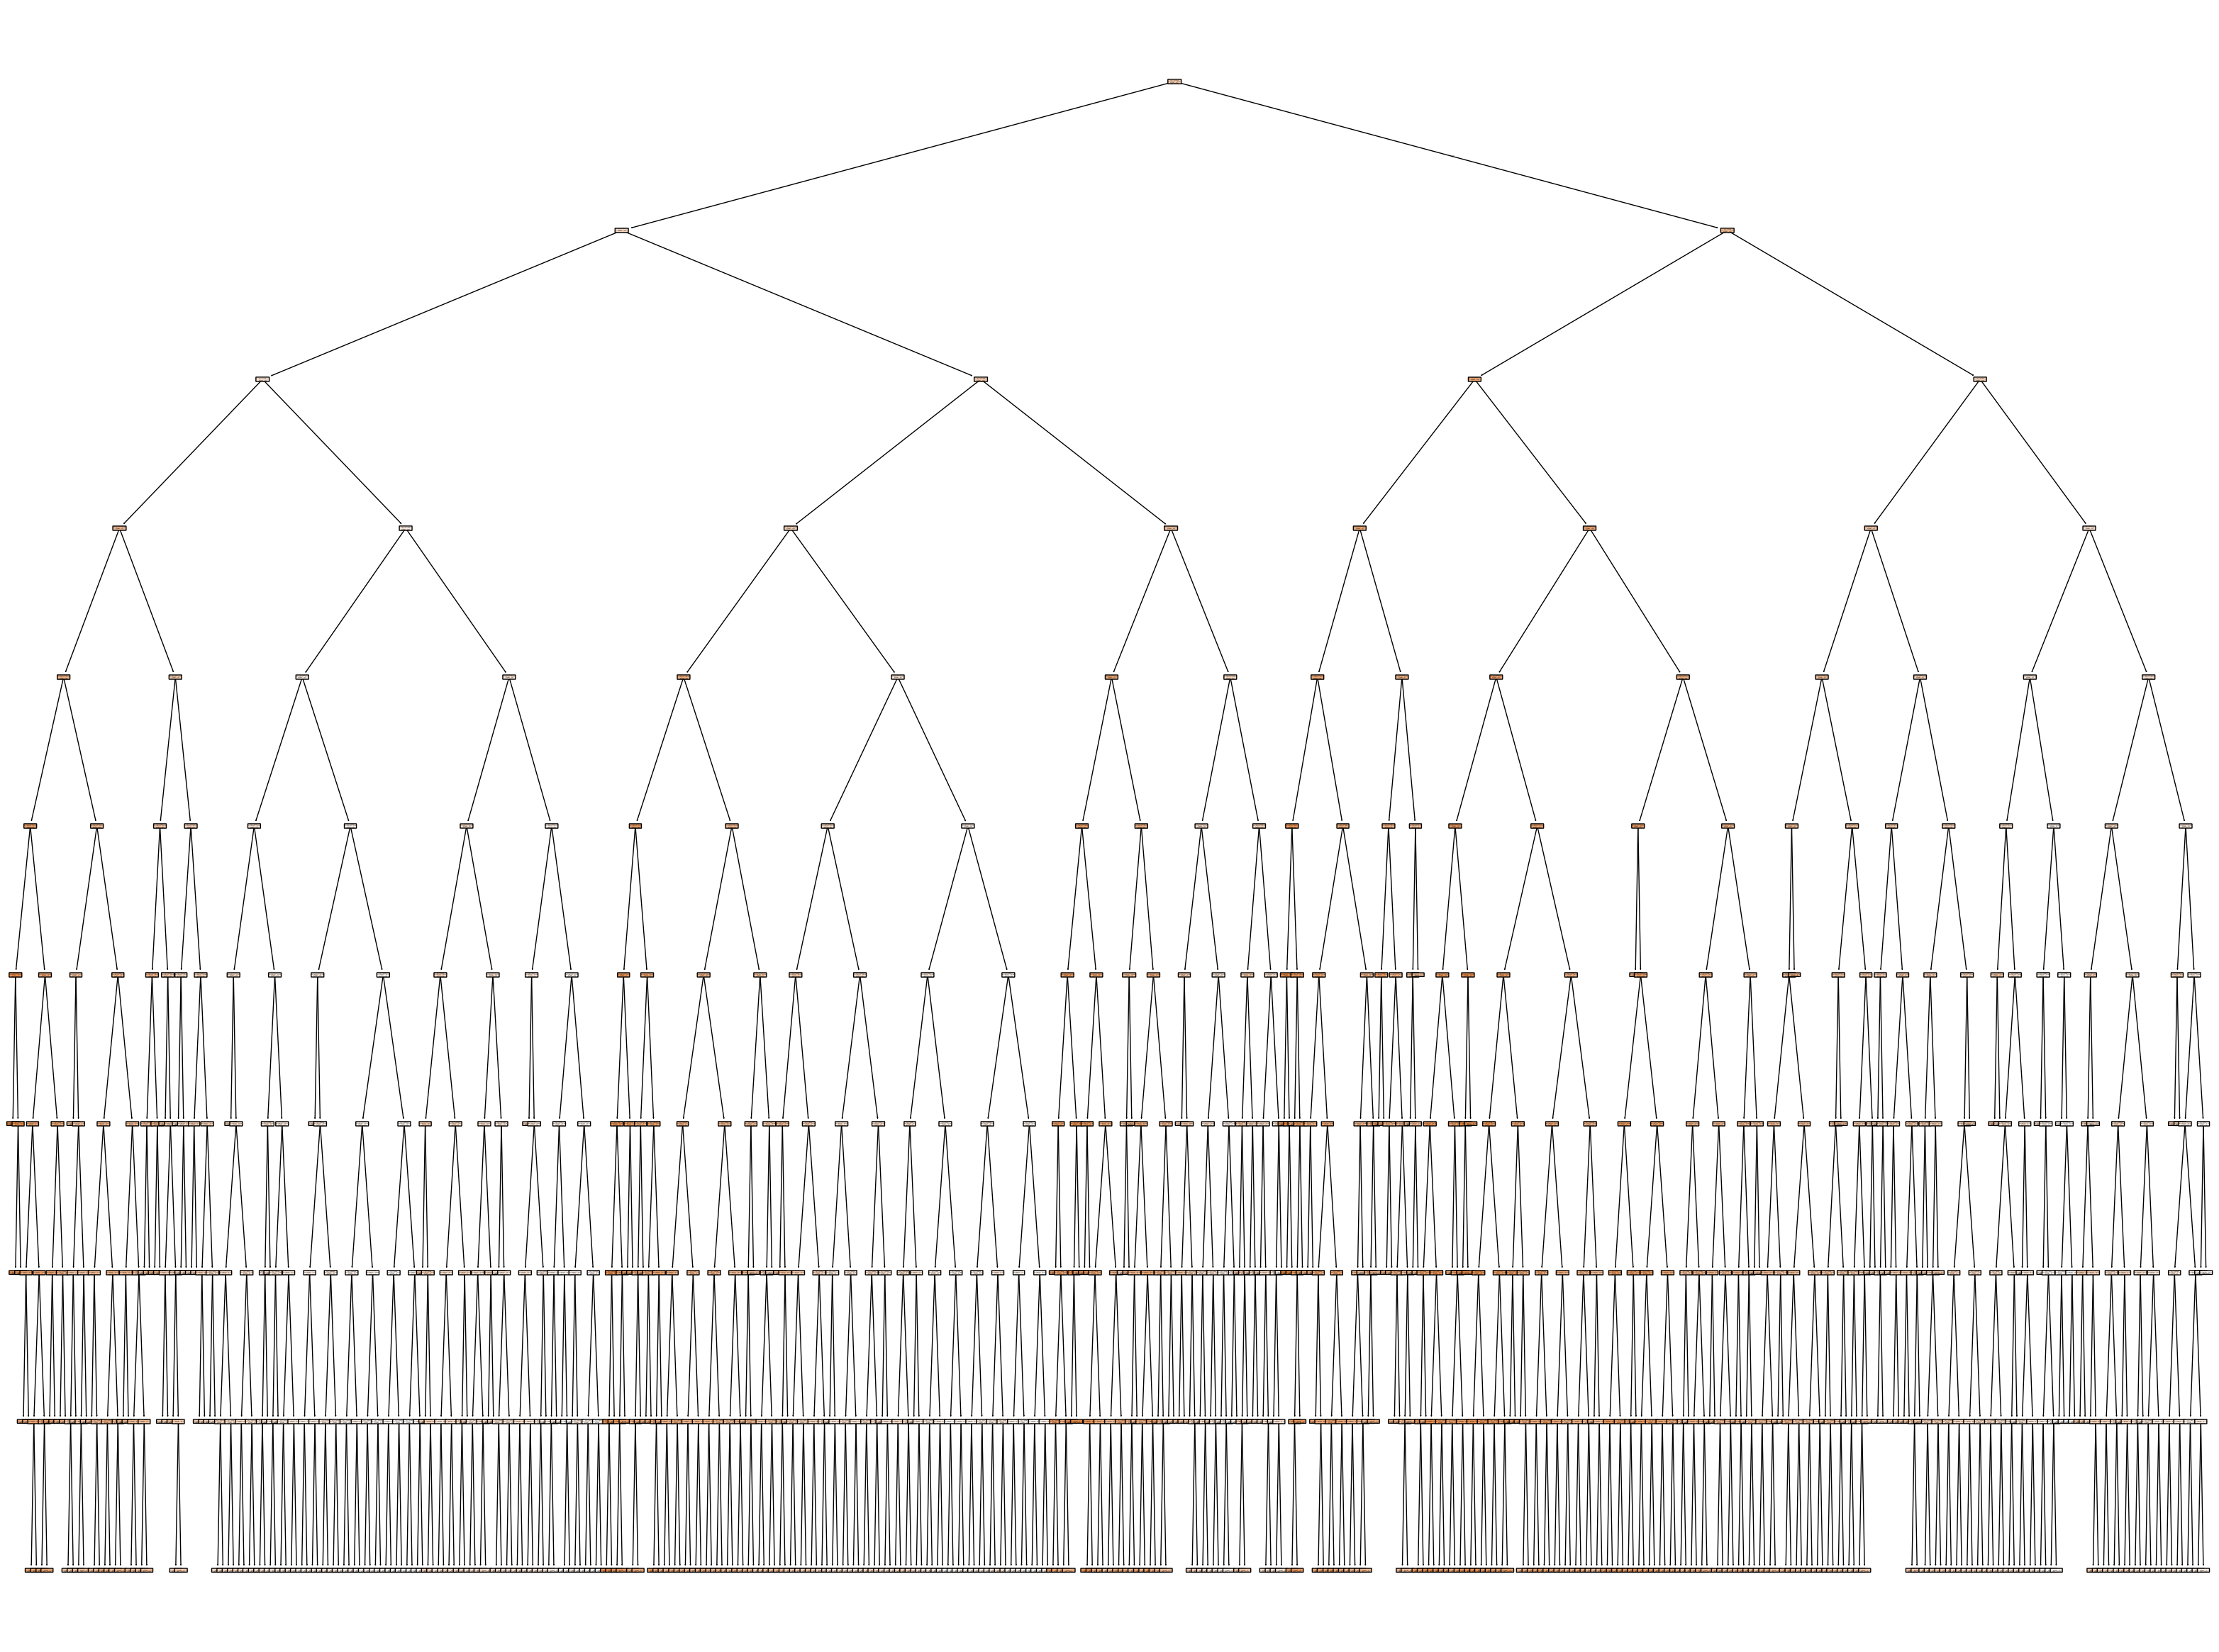

In [74]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree #Create the tree diagram from the decision tree model

#Plot the decision tree
plt.figure(figsize=(40,30))
plot_tree(
    tree_model,
    feature_names=['AT','V','AP','RH'],
#    feature_names=X.columns,
    filled=True,
    rounded=True)

Lets try Random Forest Regression

# **Random Forest Regression**

# **1.1 Import necessary Libraries**

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

ccp = pd.read_excel("/content/drive/MyDrive/Folds5x2_pp.xlsx")

ccp.shape

(9568, 5)

# **1.2 Define X and Y**

In [19]:
X = ccp.drop("PE", axis = 1).values
#X= ccp.drop(["PE","AP","RH"], axis=1).values # 2d array (each row has 4 features)
#X= ccp.drop ("AP", axis=1)
#X= ccp.drop ("RH", axis=1)
y = ccp["PE"].values # 1d array (label)

In [20]:
ccp.columns
#X.AT=X.AT.astype("category")
#X.V=X.V.astype("category")
#X.AP=X.AP.astype("category")
#X.RH=X.RH.astype("category")

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [21]:
X=pd.DataFrame(X,columns=['AT','V', 'AP', 'RH']) # convert back from Numpy list to pandas Data Frame
#X=pd.DataFrame(X,columns=['AT','V'])
#convert X from numpy array to DataFrame
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [22]:
y=pd.DataFrame(y,columns=["PE"])# convert back from Numpy list to Pandas Data Frame
print(type(y))

<class 'pandas.core.frame.DataFrame'>


# **1.3 Generate Train Test Split**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [24]:
len(y_test)

1914

# **1.4 Create our Random Forest Regressor (RFR) model**

In [25]:
model4=RandomForestRegressor(n_estimators=500,max_features=3,max_samples=60,oob_score=True,random_state=0)
model4.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features=3, max_samples=60, n_estimators=500,
                      oob_score=True, random_state=0)

In [26]:
print(X)

         AT      V       AP     RH
0     14.96  41.76  1024.07  73.17
1     25.18  62.96  1020.04  59.08
2      5.11  39.40  1012.16  92.14
3     20.86  57.32  1010.24  76.64
4     10.82  37.50  1009.23  96.62
...     ...    ...      ...    ...
9563  16.65  49.69  1014.01  91.00
9564  13.19  39.18  1023.67  66.78
9565  31.32  74.33  1012.92  36.48
9566  24.48  69.45  1013.86  62.39
9567  21.60  62.52  1017.23  67.87

[9568 rows x 4 columns]


In [27]:
print(y)

          PE
0     463.26
1     444.37
2     488.56
3     446.48
4     473.90
...      ...
9563  460.03
9564  469.62
9565  429.57
9566  435.74
9567  453.28

[9568 rows x 1 columns]


# **1.5 Evaluate our model**

In [28]:
rf=model4.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [29]:
print(f"OOB Score:{(rf.oob_score_)}")

OOB Score:0.9359519843591314


In [30]:
model4.feature_importances_

array([0.62426116, 0.33254536, 0.02344914, 0.01974435])

In [31]:
model4.n_features_in_

4

In [32]:
rf.n_outputs_

1

In [33]:
rf.feature_names_in_

array(['AT', 'V', 'AP', 'RH'], dtype=object)

Plotting the importance features (high values comparison)

<Axes: >

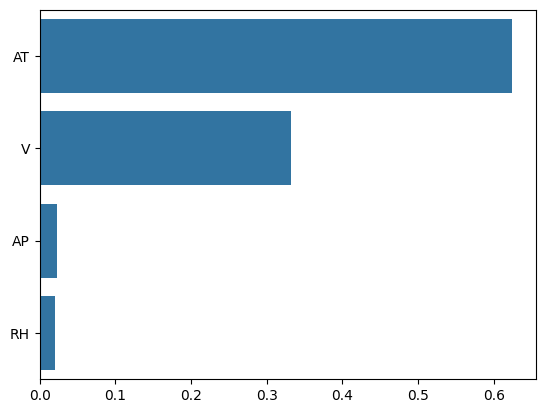

In [34]:
sns.barplot(x=rf.feature_importances_, y=rf.feature_names_in_)

In [35]:
import numpy as np
predicted_PE=rf.predict(X_test)
mse=mean_squared_error(y_true=y_test,y_pred=predicted_PE)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 17.412588544134092
Root Mean Squared Error: 4.172839386333255




Comparison of RMSE Values LinearRegression = Root Mean Squared Error: 4.44226285844249. The RMSE value is still within the acceptable range because it's Relative Error is lesser than 1%. Spec within 10%-15% is still acceptable

If drop AP and RH, we are getting even worst results as below :

Mean Squared Error: 23.50970822077997

Root Mean Squared Error: 4.848681080539322

DecisionTreeRegressor = Root Mean Squared Error: 4.856472708482368

DecisionTreeRegressor (after tuned)= Root Mean Squared Error: 3.9117326809388953

RandomForestRegressor = Root Mean Squared Error: 4.172839386333255

So, DecisionTreeRegressor (after tuned) have smaller differences (smaller value). Using DecisionTreeRegressor (after tuned) but with the max-depth 10 is Not practical/Logic.
